# IMPORTING ALL THE NECCESARY LIBRARIES

### .This section imports all the required libraries for data manipulation, numerical operations , and visualization .
- ### These tools will be used for cleaning, analyzing, and visualizing the data.

In [32]:
import pandas as pd         # For data manipulation
import numpy as np          # For numerical operations
import matplotlib.pyplot as plt  # For basic plotting
import seaborn as sns       # For advanced visualization
from datetime import datetime  # For working with dates
import scipy.stats as stats  # For statistical analysis
import plotly.express as px  # For interactive visualizations
import openpyxl             # For handling Excel files 

# IMPORTING THE DATASETS

#### .In this step, the datasets are imported from CSV files. The two payment dataset contains payment information, while the sales dataset (sales.csv) tracks the sales transactions
> These datasets will be the basis of the analysis.

In [34]:
payments = pd.read_csv("Documents/payments.csv")
payments.head()

,NAME,NUMBER,METHOD,AMOUNT,DATE,Unnamed: 5,Unnamed: 6
0,JULIUS MWANIKI,724268168.0,SGP4R1FDXU,200,25/7/2024,NaN,NaN
1,NDERITU,798260521.0,SGP0RDHUX0,450,25/7/2024,NaN,NaN
2,KEN,722211950.0,SGP0RQ7802,200,25/7/2024,NaN,NaN
3,BEN NGURI,NaN,CASH,500,25/7/2024,NaN,NaN
4,CAROLYNE,721858683.0,SGP4RZCIKC,1200,25/7/2024,NaN,NaN


In [36]:
sales = pd.read_csv("Documents/sales.csv")
sales.tail(n=5)

,NAMES,SALES,DATE
902,MAGRATE,600,13/6/2024
903,JAMES MAINA,600,13/6/2024
904,GRACE,4800,13/6/2024
905,JENIFFER,900,13/6/2024
906,FATUMA,3200,13/6/2024


In [38]:
second_payments = pd.read_csv("Documents/finalpayment.csv")
second_payments.head(n=20)

,NAME,NUMBER,METHOD,AMOUNT,DATE,Unnamed: 5,Unnamed: 6
0,GEORGE,NaN,CASH,2300,29/12/2023,NaN,NaN
1,CAROL,715580777.0,RLT3IHRROZ,2000,29/12/2023,NaN,NaN
2,DAVID KAMAU,720313461.0,RLT5I1FK2J,1100,29/12/2023,NaN,NaN
3,GICHANE,723042509.0,RLS6G9IIKA,1600,28/12/2023,NaN,NaN
4,MURIGI,722174241.0,RLS8FW0N7G,1900,28/12/2023,NaN,NaN
5,RICHARD,725742086.0,RLS0FM7DEO,1000,28/12/2023,NaN,NaN
6,PETER MWAI,713800464.0,RLS3F4AKQD,1430,28/12/2023,NaN,NaN
7,IBRAHIM,NaN,RLS7F2B3DN,1500,28/12/2023,NaN,NaN
8,IRENE,NaN,CREDIT CARD,4000,29/12/2023,NaN,NaN
9,DAN WACHIRA,718101945.0,RLT4IVEYI4,400,29/12/2023,NaN,NaN


# UNDERSTANDING THE DATA

## .This section provides a quick overview of the data by displaying the first few rows of each dataset. This step helps in understanding:

>>1. The structure of the data (e.g., number of rows and columns),the general information fo the data.
>>2. Column names and whether they match expectations or need renaming for clarity.
>>3. Potential data quality issues, such as missing values, inconsistent formatting, or outliers.
>>4. The presence of any redundant columns that may need to be dropped.
>>5. Types of variables (e.g., categorical, numerical, date) to determine appropriate cleaning and analysis methods.
>### By reviewing the first few rows, we can also identify if further preprocessing is required before diving into deeper analysis, ensuring that the data is clean, consistent, and ready for meaningful insights.

In [42]:
payments.head(7)

,NAME,NUMBER,METHOD,AMOUNT,DATE,Unnamed: 5,Unnamed: 6
0,JULIUS MWANIKI,724268168.0,SGP4R1FDXU,200,25/7/2024,NaN,NaN
1,NDERITU,798260521.0,SGP0RDHUX0,450,25/7/2024,NaN,NaN
2,KEN,722211950.0,SGP0RQ7802,200,25/7/2024,NaN,NaN
3,BEN NGURI,NaN,CASH,500,25/7/2024,NaN,NaN
4,CAROLYNE,721858683.0,SGP4RZCIKC,1200,25/7/2024,NaN,NaN
5,NDERITU,721958180.0,SGP4T77R4A,500,25/7/2024,NaN,NaN
6,EDWIN,113509125.0,SGQ9VPOMON,1500,26/7/2024,NaN,NaN


In [44]:
payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NAME        318 non-null    object 
 1   NUMBER      250 non-null    float64
 2   METHOD      318 non-null    object 
 3   AMOUNT      318 non-null    int64  
 4   DATE        318 non-null    object 
 5   Unnamed: 5  4 non-null      object 
 6   Unnamed: 6  1 non-null      float64
dtypes: float64(2), int64(1), object(4)
memory usage: 17.5+ KB


In [46]:
# CHECKING THE COLUMNS NAMES
payments.columns

Index(['NAME ', 'NUMBER', 'METHOD', 'AMOUNT', 'DATE', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

In [48]:
sales.head(5)

,NAMES,SALES,DATE
0,BENJAMIN,700,2/1/2024
1,NJONJO,3400,2/1/2024
2,BERNARD,1000,2/1/2024
3,ALBERT,5500,2/1/2024
4,GREG,2100,2/1/2024


In [50]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NAMES   907 non-null    object
 1   SALES   907 non-null    int64 
 2   DATE    907 non-null    object
dtypes: int64(1), object(2)
memory usage: 21.4+ KB


In [52]:
#CHECKING COLUMNS NAMES
sales.columns

Index(['NAMES', 'SALES', 'DATE'], dtype='object')

In [54]:
second_payments.head(n=5)

,NAME,NUMBER,METHOD,AMOUNT,DATE,Unnamed: 5,Unnamed: 6
0,GEORGE,NaN,CASH,2300,29/12/2023,NaN,NaN
1,CAROL,715580777.0,RLT3IHRROZ,2000,29/12/2023,NaN,NaN
2,DAVID KAMAU,720313461.0,RLT5I1FK2J,1100,29/12/2023,NaN,NaN
3,GICHANE,723042509.0,RLS6G9IIKA,1600,28/12/2023,NaN,NaN
4,MURIGI,722174241.0,RLS8FW0N7G,1900,28/12/2023,NaN,NaN


In [56]:
second_payments.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041 entries, 0 to 1040
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   NAME        1041 non-null   object 
 1   NUMBER      776 non-null    float64
 2   METHOD      1041 non-null   object 
 3   AMOUNT      1041 non-null   int64  
 4   DATE        1041 non-null   object 
 5   Unnamed: 5  57 non-null     object 
 6   Unnamed: 6  5 non-null      object 
dtypes: float64(1), int64(1), object(5)
memory usage: 57.1+ KB


In [58]:
second_payments.columns

Index(['NAME', 'NUMBER', 'METHOD', 'AMOUNT', 'DATE', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

# CLEANING THE DATA

* # CHECKING THE NAN VALUES

In [62]:
payments.head(n=7)

,NAME,NUMBER,METHOD,AMOUNT,DATE,Unnamed: 5,Unnamed: 6
0,JULIUS MWANIKI,724268168.0,SGP4R1FDXU,200,25/7/2024,NaN,NaN
1,NDERITU,798260521.0,SGP0RDHUX0,450,25/7/2024,NaN,NaN
2,KEN,722211950.0,SGP0RQ7802,200,25/7/2024,NaN,NaN
3,BEN NGURI,NaN,CASH,500,25/7/2024,NaN,NaN
4,CAROLYNE,721858683.0,SGP4RZCIKC,1200,25/7/2024,NaN,NaN
5,NDERITU,721958180.0,SGP4T77R4A,500,25/7/2024,NaN,NaN
6,EDWIN,113509125.0,SGQ9VPOMON,1500,26/7/2024,NaN,NaN


In [64]:
payments.isnull().any()

NAME          False
NUMBER         True
METHOD        False
AMOUNT        False
DATE          False
Unnamed: 5     True
Unnamed: 6     True
dtype: bool

In [66]:
sales.isnull().any()

NAMES    False
SALES    False
DATE     False
dtype: bool

In [68]:
# COUNT THE NULL VALUES IN EACH COLUMN
payments.isnull().sum()

NAME            0
NUMBER         68
METHOD          0
AMOUNT          0
DATE            0
Unnamed: 5    314
Unnamed: 6    317
dtype: int64

In [70]:
# DISPLAY THE ROWS WITH THE NULL VALUES
payments[payments.isnull().any(axis=1)]

,NAME,NUMBER,METHOD,AMOUNT,DATE,Unnamed: 5,Unnamed: 6
0,JULIUS MWANIKI,7.242682e+08,SGP4R1FDXU,200,25/7/2024,NaN,NaN
1,NDERITU,7.982605e+08,SGP0RDHUX0,450,25/7/2024,NaN,NaN
2,KEN,7.222120e+08,SGP0RQ7802,200,25/7/2024,NaN,NaN
3,BEN NGURI,NaN,CASH,500,25/7/2024,NaN,NaN
4,CAROLYNE,7.218587e+08,SGP4RZCIKC,1200,25/7/2024,NaN,NaN
...,...,...,...,...,...,...,...
313,JEFF,7.274519e+08,SIG2SXLNU2,2700,16/9/2024,NaN,NaN
314,EMMAH,7.015596e+08,SIG2S4TQWS,6300,16/9/2024,NaN,NaN
315,ESTHER,7.115977e+09,SIG8RQMZ3U,600,16/9/2024,NaN,NaN
316,EDWARD,7.228412e+08,SIG6R3BD9S,3100,16/9/2024,NaN,NaN


In [72]:
second_payments.head(20)

,NAME,NUMBER,METHOD,AMOUNT,DATE,Unnamed: 5,Unnamed: 6
0,GEORGE,NaN,CASH,2300,29/12/2023,NaN,NaN
1,CAROL,715580777.0,RLT3IHRROZ,2000,29/12/2023,NaN,NaN
2,DAVID KAMAU,720313461.0,RLT5I1FK2J,1100,29/12/2023,NaN,NaN
3,GICHANE,723042509.0,RLS6G9IIKA,1600,28/12/2023,NaN,NaN
4,MURIGI,722174241.0,RLS8FW0N7G,1900,28/12/2023,NaN,NaN
5,RICHARD,725742086.0,RLS0FM7DEO,1000,28/12/2023,NaN,NaN
6,PETER MWAI,713800464.0,RLS3F4AKQD,1430,28/12/2023,NaN,NaN
7,IBRAHIM,NaN,RLS7F2B3DN,1500,28/12/2023,NaN,NaN
8,IRENE,NaN,CREDIT CARD,4000,29/12/2023,NaN,NaN
9,DAN WACHIRA,718101945.0,RLT4IVEYI4,400,29/12/2023,NaN,NaN


In [74]:
second_payments.isnull().any()

NAME          False
NUMBER         True
METHOD        False
AMOUNT        False
DATE          False
Unnamed: 5     True
Unnamed: 6     True
dtype: bool

In [76]:
#COUNT THE NULL VALUES IN EACH COLUMNS
second_payments.isnull().sum()

NAME             0
NUMBER         265
METHOD           0
AMOUNT           0
DATE             0
Unnamed: 5     984
Unnamed: 6    1036
dtype: int64

# DROPPING THE COLUMNS WITH NAN VALUES

> ### The data cleaning process is a crucial step to ensure that the dataset is structured and ready for analysis. In this stag i dropped the irrelevant columns: Columns Unnamed: 5 and Unnamed: 6 and number which contained no useful information, were removed. This reduces noise and ensures only relevant data is retained.

### THE FIRST PAYMENT DATA

In [81]:
# CREATING A COPY OF THE ORIGINAL DATA 
payments_copy = payments.copy()
payments_copy.head()

,NAME,NUMBER,METHOD,AMOUNT,DATE,Unnamed: 5,Unnamed: 6
0,JULIUS MWANIKI,724268168.0,SGP4R1FDXU,200,25/7/2024,NaN,NaN
1,NDERITU,798260521.0,SGP0RDHUX0,450,25/7/2024,NaN,NaN
2,KEN,722211950.0,SGP0RQ7802,200,25/7/2024,NaN,NaN
3,BEN NGURI,NaN,CASH,500,25/7/2024,NaN,NaN
4,CAROLYNE,721858683.0,SGP4RZCIKC,1200,25/7/2024,NaN,NaN


In [83]:
#DROPPING THE COLUMNS
columns_to_drop = payments_copy.columns[[5,6]]
payments_copy.drop(columns=columns_to_drop,inplace = True)
payments_copy.head(n=6)

,NAME,NUMBER,METHOD,AMOUNT,DATE
0,JULIUS MWANIKI,724268168.0,SGP4R1FDXU,200,25/7/2024
1,NDERITU,798260521.0,SGP0RDHUX0,450,25/7/2024
2,KEN,722211950.0,SGP0RQ7802,200,25/7/2024
3,BEN NGURI,NaN,CASH,500,25/7/2024
4,CAROLYNE,721858683.0,SGP4RZCIKC,1200,25/7/2024
5,NDERITU,721958180.0,SGP4T77R4A,500,25/7/2024


In [85]:
# CHECKING THE ROWS THAT HAS NAN VALUES AT ANY GIVEN COLUMN 
payments_copy.isnull().sum()

NAME       0
NUMBER    68
METHOD     0
AMOUNT     0
DATE       0
dtype: int64

In [87]:
# Display rows that contain any NaN values
payments_copy[payments_copy.isnull().any(axis=1)]

,NAME,NUMBER,METHOD,AMOUNT,DATE
3,BEN NGURI,NaN,CASH,500,25/7/2024
10,MAUREEN,NaN,CREDITCARD,1600,27/7/2024
11,MIKE NENE,NaN,CREDITCARD,2400,27/7/2024
12,AZIZ,NaN,CASH,500,27/7/2024
13,EDWARD,NaN,CASH,1800,27/7/2024
...,...,...,...,...,...
289,GRACE,NaN,CASH,5100,11/9/2024
290,FABIAN,NaN,CASH,1400,12/9/2024
299,WALLACE,NaN,CASH,550,13/9/2024
312,WANJIRU MACHARIA,NaN,CREDITCARD,4200,15/9/2024


In [89]:
#DROPPING THE NUMBER COLUMN
payments_copy.drop(columns = 'NUMBER',inplace = True)

In [91]:
# CHECKING IF  'NUMBER' IS IN COLUMNS
if 'NUMBER' in payments_copy.columns:
    print("The 'NUMBER' column exists.")
else:
    print("The 'NUMBER' column does not exist.")


The 'NUMBER' column does not exist.


In [93]:
payments_copy.head(n=5)

,NAME,METHOD,AMOUNT,DATE
0,JULIUS MWANIKI,SGP4R1FDXU,200,25/7/2024
1,NDERITU,SGP0RDHUX0,450,25/7/2024
2,KEN,SGP0RQ7802,200,25/7/2024
3,BEN NGURI,CASH,500,25/7/2024
4,CAROLYNE,SGP4RZCIKC,1200,25/7/2024


### SECOND PAYMENT DATA

In [96]:
second_payments_copy = second_payments.copy()
second_payments_copy.head(20)

,NAME,NUMBER,METHOD,AMOUNT,DATE,Unnamed: 5,Unnamed: 6
0,GEORGE,NaN,CASH,2300,29/12/2023,NaN,NaN
1,CAROL,715580777.0,RLT3IHRROZ,2000,29/12/2023,NaN,NaN
2,DAVID KAMAU,720313461.0,RLT5I1FK2J,1100,29/12/2023,NaN,NaN
3,GICHANE,723042509.0,RLS6G9IIKA,1600,28/12/2023,NaN,NaN
4,MURIGI,722174241.0,RLS8FW0N7G,1900,28/12/2023,NaN,NaN
5,RICHARD,725742086.0,RLS0FM7DEO,1000,28/12/2023,NaN,NaN
6,PETER MWAI,713800464.0,RLS3F4AKQD,1430,28/12/2023,NaN,NaN
7,IBRAHIM,NaN,RLS7F2B3DN,1500,28/12/2023,NaN,NaN
8,IRENE,NaN,CREDIT CARD,4000,29/12/2023,NaN,NaN
9,DAN WACHIRA,718101945.0,RLT4IVEYI4,400,29/12/2023,NaN,NaN


In [98]:
columns_to_drop = second_payments_copy.columns[[5,6]]
second_payments_copy.drop(columns = columns_to_drop,inplace = True)

In [100]:
second_payments_copy.tail()

,NAME,NUMBER,METHOD,AMOUNT,DATE
1036,ANTONY MWANGI,722959606.0,SGN1KXAPRB,200,23/7/2024
1037,PRISCILA,722174241.0,SGN9LADBPJ,3000,23/7/2024
1038,DAVID KAMAU,720313461.0,SGO7N7NE2X,700,24/7/2024
1039,IMPALA,713444974.0,SGO5OOQ371,1000,24/7/2024
1040,MACHARIA,NaN,CASH,1400,24/7/2024


In [102]:
#DROPPING THE NUMBER COLUMN
second_payments_copy.drop(columns = 'NUMBER',inplace = True)

In [104]:
#CHECKING IF NUMBER COLUMN EXISTS
# CHECKING IF  'NUMBER' IS IN COLUMNS
if 'NUMBER' in second_payments_copy.columns:
    print("The 'NUMBER' column exists.")
else:
    print("The 'NUMBER' column does not exist.")


The 'NUMBER' column does not exist.


In [106]:
second_payments_copy.head(n=4)

,NAME,METHOD,AMOUNT,DATE
0,GEORGE,CASH,2300,29/12/2023
1,CAROL,RLT3IHRROZ,2000,29/12/2023
2,DAVID KAMAU,RLT5I1FK2J,1100,29/12/2023
3,GICHANE,RLS6G9IIKA,1600,28/12/2023


## REMOVING SPACES 

In [109]:
print(type(payments_copy))

<class 'pandas.core.frame.DataFrame'>


In [111]:
payments_copy.columns = payments_copy.columns.str.strip()
payments_copy.columns

Index(['NAME', 'METHOD', 'AMOUNT', 'DATE'], dtype='object')

In [113]:
second_payments_copy.columns = second_payments_copy.columns.str.strip()
second_payments_copy.columns

Index(['NAME', 'METHOD', 'AMOUNT', 'DATE'], dtype='object')

In [129]:
sales_copy.columns.str.strip()

Index(['NAMES', 'SALES', 'DATE'], dtype='object')

Column names were stripped of unnecessary spaces to standardize and avoid any potential referencing issues when manipulating the data.

# RENAMING INDEX NO

In [119]:
payments_copy.tail(n=5)

,NAME,METHOD,AMOUNT,DATE
313,JEFF,SIG2SXLNU2,2700,16/9/2024
314,EMMAH,SIG2S4TQWS,6300,16/9/2024
315,ESTHER,SIG8RQMZ3U,600,16/9/2024
316,EDWARD,SIG6R3BD9S,3100,16/9/2024
317,MARYANN,CREDITCARD,5200,16/9/2024


In [121]:
payments_copy.rename_axis("ID NO",inplace = True)

In [123]:
payments_copy.tail(6)

,NAME,METHOD,AMOUNT,DATE
ID NO,,,,
312,WANJIRU MACHARIA,CREDITCARD,4200,15/9/2024
313,JEFF,SIG2SXLNU2,2700,16/9/2024
314,EMMAH,SIG2S4TQWS,6300,16/9/2024
315,ESTHER,SIG8RQMZ3U,600,16/9/2024
316,EDWARD,SIG6R3BD9S,3100,16/9/2024
317,MARYANN,CREDITCARD,5200,16/9/2024


In [125]:
sales_copy = sales.copy()

In [131]:
sales_copy.tail(n=6)

,NAMES,SALES,DATE
901,KIRUMBA,2300,12/6/2024
902,MAGRATE,600,13/6/2024
903,JAMES MAINA,600,13/6/2024
904,GRACE,4800,13/6/2024
905,JENIFFER,900,13/6/2024
906,FATUMA,3200,13/6/2024


In [133]:
sales_copy.rename_axis("ID NO",inplace = True)

In [135]:
sales_copy.tail(n=8)

,NAMES,SALES,DATE
ID NO,,,
899,CAROL MUTHONI,4000,12/6/2024
900,ANN,1000,12/6/2024
901,KIRUMBA,2300,12/6/2024
902,MAGRATE,600,13/6/2024
903,JAMES MAINA,600,13/6/2024
904,GRACE,4800,13/6/2024
905,JENIFFER,900,13/6/2024
906,FATUMA,3200,13/6/2024


In [137]:
second_payments_copy.rename_axis("ID NO",inplace = True)

In [139]:
second_payments_copy.tail(n=5)

,NAME,METHOD,AMOUNT,DATE
ID NO,,,,
1036,ANTONY MWANGI,SGN1KXAPRB,200,23/7/2024
1037,PRISCILA,SGN9LADBPJ,3000,23/7/2024
1038,DAVID KAMAU,SGO7N7NE2X,700,24/7/2024
1039,IMPALA,SGO5OOQ371,1000,24/7/2024
1040,MACHARIA,CASH,1400,24/7/2024


# CHECKING THE DATA TYPES

The DATE columns in all datasets were converted to datetime format. This ensures that all dates are consistently formatted and allows for accurate date-based analysis.

## CONVERTING THE DATA TYPES

In [148]:
payments_copy.dtypes

NAME      object
METHOD    object
AMOUNT     int64
DATE      object
dtype: object

In [150]:
sales_copy.dtypes

NAMES    object
SALES     int64
DATE     object
dtype: object

In [152]:
# CONVERTING THE DATE FROM OBJECTS TO DATETIME
payments_copy["DATE"]= pd.to_datetime(payments_copy["DATE"],format = '%d/%m/%Y')
payments_copy.head()

,NAME,METHOD,AMOUNT,DATE
ID NO,,,,
0,JULIUS MWANIKI,SGP4R1FDXU,200,2024-07-25
1,NDERITU,SGP0RDHUX0,450,2024-07-25
2,KEN,SGP0RQ7802,200,2024-07-25
3,BEN NGURI,CASH,500,2024-07-25
4,CAROLYNE,SGP4RZCIKC,1200,2024-07-25


In [154]:
payments_copy.dtypes

NAME              object
METHOD            object
AMOUNT             int64
DATE      datetime64[ns]
dtype: object

In [156]:
sales_copy["DATE"]= pd.to_datetime(sales_copy["DATE"],format = '%d/%m/%Y')
sales_copy.head()

,NAMES,SALES,DATE
ID NO,,,
0,BENJAMIN,700,2024-01-02
1,NJONJO,3400,2024-01-02
2,BERNARD,1000,2024-01-02
3,ALBERT,5500,2024-01-02
4,GREG,2100,2024-01-02


In [158]:
sales_copy.dtypes

NAMES            object
SALES             int64
DATE     datetime64[ns]
dtype: object

## SECOND PAYMENT DATA 

In [161]:
second_payments_copy.head(20)

,NAME,METHOD,AMOUNT,DATE
ID NO,,,,
0,GEORGE,CASH,2300,29/12/2023
1,CAROL,RLT3IHRROZ,2000,29/12/2023
2,DAVID KAMAU,RLT5I1FK2J,1100,29/12/2023
3,GICHANE,RLS6G9IIKA,1600,28/12/2023
4,MURIGI,RLS8FW0N7G,1900,28/12/2023
5,RICHARD,RLS0FM7DEO,1000,28/12/2023
6,PETER MWAI,RLS3F4AKQD,1430,28/12/2023
7,IBRAHIM,RLS7F2B3DN,1500,28/12/2023
8,IRENE,CREDIT CARD,4000,29/12/2023


In [163]:
second_payments_copy.dtypes

NAME      object
METHOD    object
AMOUNT     int64
DATE      object
dtype: object

In [165]:
second_payments_copy['DATE'].unique()

array(['29/12/2023', '28/12/2023', '30/12/2023', '2/1/2024', '3/1/2024',
       '4/1/2024', '30/12/23', '5/1/2024', '6/1/2024', '7/1/2024',
       '8/1/2024', '9/1/2024', '10/1/2024', '11/1/2024', '12/1/2024',
       '13/1/2024', '14/1/2024', '15/1/2024', '16/1/2024', '17/1/2024',
       '18/1/2024', '19/1/2024', '20/1/2024', '21/1/2024', '22/1/2024',
       '23/1/2024', '24/1/2024', '25/1/2024', '26/1/2024', '27/1/2024',
       '28/1/2024', '29/1/2024', '30/1/2024', '31/1/2024', '1/2/2024',
       '2/2/2024', '3/2/2024', '4/2/2024', '5/2/2024', '6/2/2024',
       '7/2/2024', '8/2/2024', '9/2/2024', '10/2/2024', '11/2/2004',
       '11/2/2024', '12/2/2024', '13/2/2024', '14/2/2024', '15/2/2024',
       '16/2/2024', '17/2/2024', '18/2/2024', '19/2/2024', '20/2/2024',
       '21/2/2024', '22/2/2024', '23/2/2024', '24/2/2024', '25/2/2024',
       '26/2/2024', '26/5/2024', '27/2/2024', '28/2/2024', '29/2/2024',
       '1/3/2024', '2/3/2024', '3/3/2024', '4/3/2024', '5/3/2024',
       '6/3/

#### .While changing the data type of the second payment i realized that some dates (year) was a two digit number and others were four digit number ,i needed pandas to interprate them as year.
#### -The  row had date value that could not be interpretated ,i identifyed it and coerced pandas to read as dayfirst 

In [168]:
two_digit_years = second_payments_copy[second_payments_copy['DATE'].str.len() == 8]
two_digit_years

,NAME,METHOD,AMOUNT,DATE
ID NO,,,,
15,GREG,SA29W0SXI3,1400,2/1/2024
16,ALEX MAINA,SA21UWE18V,1500,2/1/2024
17,EVELYN,CASH,1000,2/1/2024
18,EDWARD MUCHIRI,CASH,1000,2/1/2024
19,PETER MWAI,SA38YRXD2E,400,3/1/2024
...,...,...,...,...
961,SIMON MBUGUA,SG87ZD70HF,1500,8/7/2024
962,MELODY,CASH,2700,9/7/2024
963,ANTONY CHUMA,CASH,2500,9/7/2024


In [170]:
second_payments_copy['DATE'] = pd.to_datetime(second_payments_copy['DATE'], errors='coerce', dayfirst=True)
second_payments_copy['DATE']

ID NO
0      2023-12-29
1      2023-12-29
2      2023-12-29
3      2023-12-28
4      2023-12-28
          ...    
1036   2024-07-23
1037   2024-07-23
1038   2024-07-24
1039   2024-07-24
1040   2024-07-24
Name: DATE, Length: 1041, dtype: datetime64[ns]

In [172]:
missing_dates = second_payments_copy[second_payments_copy['DATE'].isna()]
missing_dates

,NAME,METHOD,AMOUNT,DATE
ID NO,,,,
24,MARTIN WAINAINA,RLU8N1SPP6,1800,NaT


In [174]:
second_payments_copy.at[24, 'DATE'] = pd.to_datetime('30/12/2023', format='%d/%m/%Y')

In [176]:
missing_dates = second_payments_copy[second_payments_copy['DATE'].isna()]
missing_dates

,NAME,METHOD,AMOUNT,DATE
ID NO,,,,


# ANALYSIS

## .Since i had two payments data that had the same values i concatenated them to make one data to work with.

## CONCATENATION OF THE TWO PAYMNETS DATA

In [181]:
total_payments = pd.concat([payments_copy, second_payments_copy], ignore_index=True)
total_payments

,NAME,METHOD,AMOUNT,DATE
0,JULIUS MWANIKI,SGP4R1FDXU,200,2024-07-25
1,NDERITU,SGP0RDHUX0,450,2024-07-25
2,KEN,SGP0RQ7802,200,2024-07-25
3,BEN NGURI,CASH,500,2024-07-25
4,CAROLYNE,SGP4RZCIKC,1200,2024-07-25
...,...,...,...,...
1354,ANTONY MWANGI,SGN1KXAPRB,200,2024-07-23
1355,PRISCILA,SGN9LADBPJ,3000,2024-07-23
1356,DAVID KAMAU,SGO7N7NE2X,700,2024-07-24
1357,IMPALA,SGO5OOQ371,1000,2024-07-24


### Total payments

In [184]:
total_payments["AMOUNT"].sum()

2562240

### Total sales

In [187]:
sales_copy.head()

,NAMES,SALES,DATE
ID NO,,,
0,BENJAMIN,700,2024-01-02
1,NJONJO,3400,2024-01-02
2,BERNARD,1000,2024-01-02
3,ALBERT,5500,2024-01-02
4,GREG,2100,2024-01-02


In [189]:
sales_copy["SALES"].sum()

1543090

### Number of unique customers making sales/sales made per customer

In [192]:
sales_copy["NAMES"].nunique()

307

In [194]:
sales_copy["NAMES"].value_counts()

NAMES
PETER MWAI        21
CAROL             21
LILIAN            20
PETER NJUGUNA     19
GRACE             19
                  ..
ATEM               1
JOSEPH             1
ANTONY GITONGA     1
KENNETH MAINA      1
JENIFFER           1
Name: count, Length: 307, dtype: int64

### Number of unique customers making payments/payments made per customer

In [197]:
total_payments["NAME"].nunique()

461

In [199]:
total_payments["NAME"].value_counts()

NAME
GRACE             26
PETER NJUGUNA     25
PETER MWAI        24
EDWARD            23
CAROL             22
                  ..
MARK MUTUMA        1
PRICILLA           1
SHIRO              1
LIZZIE IRENE       1
ANTONY MWANGI      1
Name: count, Length: 461, dtype: int64

# Understanding the summary statistics

In [202]:
total_payments.describe()

,AMOUNT,DATE
count,1359.000000,1359
mean,1885.386313,2024-05-05 07:56:49.271523328
min,100.000000,2004-02-11 00:00:00
25%,700.000000,2024-03-02 12:00:00
50%,1150.000000,2024-05-15 00:00:00
75%,2200.000000,2024-07-18 12:00:00
max,30500.000000,2024-09-16 00:00:00
std,2394.498200,NaN


In [204]:
sales_copy.describe()

,SALES,DATE
count,907.000000,907
mean,1701.312018,2024-03-22 23:20:18.522601728
min,100.000000,2024-01-02 00:00:00
25%,700.000000,2024-02-09 00:00:00
50%,1100.000000,2024-03-23 00:00:00
75%,2100.000000,2024-05-04 00:00:00
max,13500.000000,2024-06-13 00:00:00
std,1676.443380,NaN


#### .After the summary statistics the minimum transaction date is in year 2004 ,since my data contains recent transactions i immediately recognized the typing error in the date 

In [207]:
#INDENTIFYING THE ROW WITH THE YEAR 2004.
old_date = total_payments[total_payments['DATE'] == '2004-02-11']
old_date

,NAME,METHOD,AMOUNT,DATE
558,NJANJA,CASH,3600,2004-02-11


In [209]:
# CORRECTING THE YEAR FROM 2004 TO 2024
old_date = total_payments['DATE'] == pd.Timestamp('2004-02-11')
total_payments.loc[old_date, 'DATE'] = total_payments.loc[old_date, 'DATE'].apply(lambda x: x.replace(year=2024))
print(total_payments[total_payments['DATE'] == '2024-02-11'])

               NAME      METHOD  AMOUNT       DATE
558          NJANJA        CASH    3600 2024-02-11
559  BEATRICE MUMBI  SBB5R51KJ3     350 2024-02-11


## .Understand the distribution of payment amounts and sales 

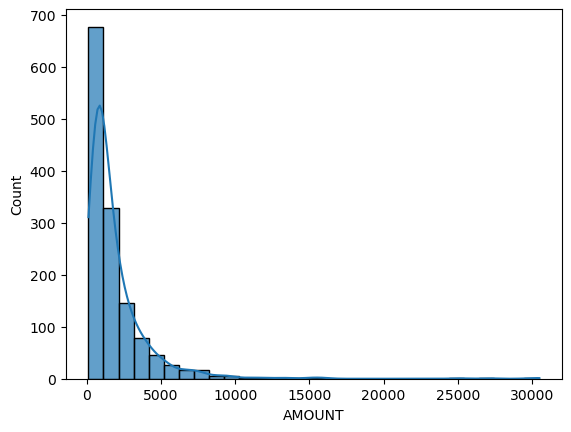

<Figure size 1600x1000 with 0 Axes>

In [212]:
sns.histplot(total_payments['AMOUNT'], kde=True,bins=30,alpha = 0.7)
plt.figure(figsize=(16, 10))
plt.show()

- The amount distribution is heavily right-skewed,indicating that most payments amounts are below 5000 with a few large payments exting the tail to the right
- The highest frequency of payment falls within the range of 0-2500,suggesting this is the most common payment amount range.
- There are large payments amounts exceeding 20000.

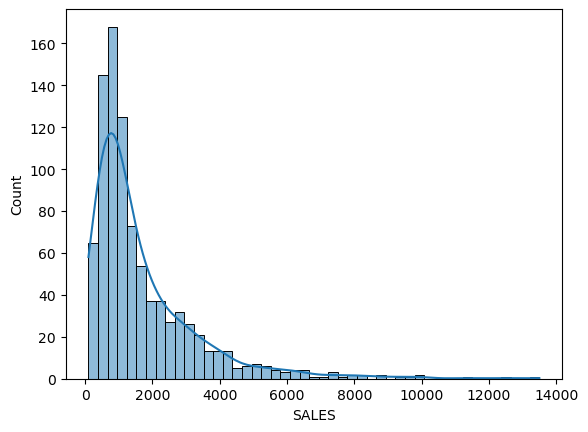

In [214]:
sns.histplot(sales_copy['SALES'], kde=True)
plt.show()

- The sales distribution is also right-skewed,indicating that most sales are concentrated in the lower range between 0-2500 with a few large sales exceeding 10000
- The highest frequency of sales falls within the range of 0 to 2500 ,suggesting this is the most common sales amount.
- There are severall large sales exceeding 10000.

## .Identifying the overall trends in payments and sales over time

In [236]:
#TOTAL PAYMENTS PER END-MONTH
payments_monthly = total_payments.resample('ME', on='DATE').sum().sort_values(by='AMOUNT', ascending=True)
payments_monthly

,NAME,METHOD,AMOUNT
DATE,,,
2023-12-31,GICHANEMURIGIRICHARDPETER MWAIIBRAHIMGEORGECAR...,RLS6G9IIKARLS8FW0N7GRLS0FM7DEORLS3F4AKQDRLS7F2...,24730
2024-09-30,ALICE WANJIRUPATRICK GATHUELIZABETHBEATRICE MU...,SI1225DH5KSI102IX610SI172TD8WXSI122UMOS6SI205O...,153850
2024-03-31,LILIANGITAUALBERT SIMIYUALBERT SIMIYUJOANNJOKI...,SC13LTWTH5SC19MAE81TSC17MT0ECFSC13NLWB2TSC24QH...,250550
2024-02-29,ANDREWNICHOLUSGEOFFREYBEATRICELUCYBEATRICE MUM...,SB15PWOW7SB14PN7OQOSAB18QHA654CASHSB22T4P4VESB...,263850
2024-07-31,CALISTOBEATRICE MUMBIMAGRATEPAUL MANGAIRENEJUL...,SG1989QFY7SG198JMYMJSG158KCEVPSG108Q7D4WCASHCA...,277940
2024-06-30,SHARON NJOKIPRISCILAHWALLACEALLANDAVIDEMMANUEL...,SF19236CZLSF182OO6CUCASHCASHCASHSF123189Y2SF21...,289380
2024-04-30,NJOKI KIHARAGODFREY GRACEDAVID KINYUAMEONGELAK...,CASHCREDIT CARDCASHSD24X4CHQ2SD29WQRTE1SD38YWD...,297470
2024-05-31,PETER MWAI PAULYN WAITITUMICHELLEPETER NJUGUNA...,SE18U34ZISSE19UWVRD1CREDIT CARDCASHSE20XHSG2OS...,310230
2024-01-31,GREGALEX MAINAEVELYNEDWARD MUCHIRIGREGPETER MW...,SA29W0SXI3SA21UWE18VCASHCASHSA29W0SXI3SA38YRXD...,334850


In [238]:
payments_monthly = total_payments.resample('ME', on='DATE').sum().sort_values(by='AMOUNT', ascending=True)
payments_monthly = payments_monthly.drop(columns=['NAME', 'METHOD'])
payments_monthly.index = payments_monthly.index.strftime('%B')

payments_monthly

,AMOUNT
DATE,
December,24730
September,153850
March,250550
February,263850
July,277940
June,289380
April,297470
May,310230
January,334850


In [309]:
#TOTAL SALES PER END-MONTH
sales_monthly = sales_copy.resample('ME', on='DATE').sum()
sales_monthly

,NAMES,SALES
DATE,,
2024-01-31,BENJAMINNJONJOBERNARDALBERTGREGGRACEPETER NJUG...,325400
2024-02-29,DANIELDANIELBEATRICEBENSTEPHEN LIGUNYAHILDAMAC...,272100
2024-03-31,MUIRURILILIANANTONY GITAULUCY KIMANIWAMBUGUKIM...,256440
2024-04-30,GODFREYJUNEBEATRICE MUMBIEMMAHWINNYNJANJAPAULY...,286080
2024-05-31,EMILYMICHELLEANDREWPAULYNMIKEPETER MWAISTEPHEN...,304920
2024-06-30,BERNARDALLANEVANSEMMANUELJAMES KARANJAPETER NJ...,98150


In [242]:
sales_monthly = sales_copy.resample('ME', on='DATE').sum().sort_values(by='SALES', ascending=True)
sales_monthly = sales_monthly.drop(columns=['NAMES'])
sales_monthly.index = sales_monthly.index.strftime('%B')

sales_monthly

,SALES
DATE,
June,98150
March,256440
February,272100
April,286080
May,304920
January,325400


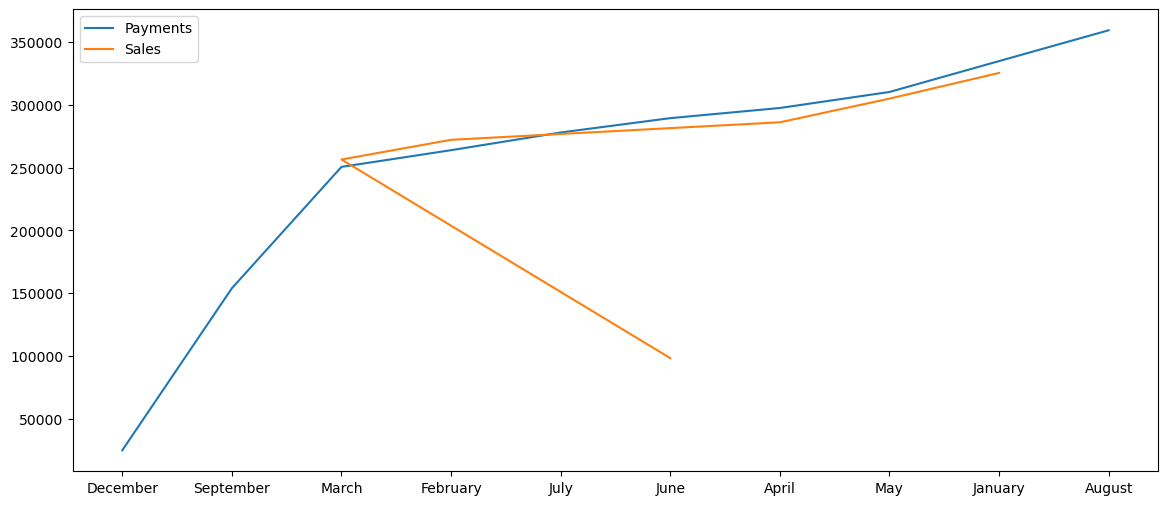

In [270]:
#VISUALIZATION OF THE PAYMENTS AND SALES TRENDS
plt.figure(figsize=(14, 6))
plt.plot(payments_monthly.index, payments_monthly['AMOUNT'], label='Payments')
plt.plot(sales_monthly.index, sales_monthly['SALES'], label='Sales')
plt.legend()
plt.show()


- The sales  trend shows a decline throught the year ,starting high and steadly decreasing.
- The payment trend also shows a decline same as the sales trend
- The trends suggests a strong correlation between the sales and the payments indicating the sales are equally linked to the payments.
- The two lines intersect around july suggesting a point where the sales equaled the payments ,before this point,sales where higher and the payments were slagging suggesting there were outstanding payments.
- After the intersection the payments exceeded the sales indicating customers were paying off the oustanding balances.

## . Analyzing the distribution of different payment methods

In [402]:
# Categorize payment methods
total_payments['METHOD'] = total_payments['METHOD'].apply(lambda x: 'MPESA' if x.startswith('S')or x.startswith('R')or x.startswith('A') else x)
total_payments['METHOD'].value_counts()

METHOD
MPESA          1027
CASH            258
CREDIT CARD      57
CREDITCARD       17
Name: count, dtype: int64

In [406]:
total_payments['METHOD'] = total_payments['METHOD'].replace({'CREDIT CARD': 'CREDITCARD'})
total_payments['METHOD'].value_counts()

METHOD
MPESA         1027
CASH           258
CREDITCARD      74
Name: count, dtype: int64

- MPESA is the most frequently used payment method, accounting for 1,027 transactions. This indicates a strong preference for mobile money payments, likely due to its convenience and widespread use in the region.
- CASH payments come in second, with 258 transactions, showing that a notable portion of customers still prefer traditional payment methods.
- CREDIT CARD payments are the least used, with only 74 transactions. This suggests either limited credit card usage among the customer base or a preference for other payment methods.

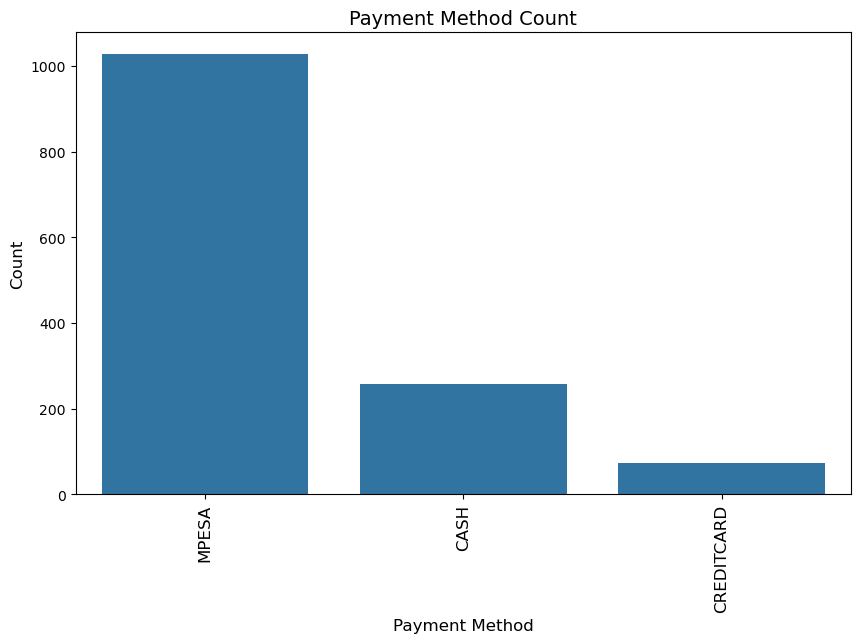

In [410]:
# VISUALIZATION OF THE DISTRIBUTION OF PAYMENT METHODS
plt.figure(figsize=(10, 6)) 
sns.countplot(data=total_payments, x='METHOD')
plt.xticks(rotation=90, fontsize=12) 
plt.title('Payment Method Count', fontsize=14)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

## . Top customers by payments and sales

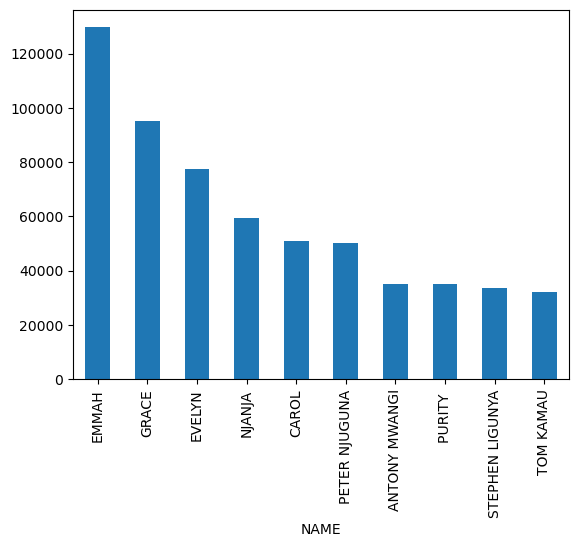

In [418]:
#TOP CUSTOMERS BY PAYMENTS
top_payment_customers = total_payments.groupby('NAME')['AMOUNT'].sum().sort_values(ascending=False).head(10)
top_payment_customers.plot(kind='bar')
plt.show()

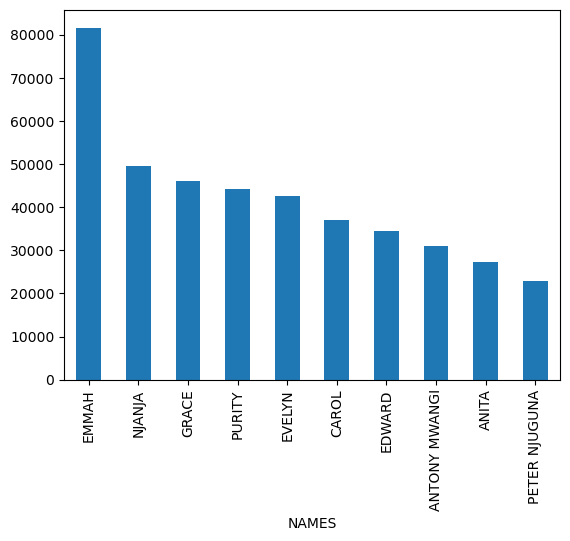

In [421]:
#TOP CUSTOMERS BY SALES
top_sales_customers = sales_copy.groupby('NAMES')['SALES'].sum().sort_values(ascending=False).head(10)
top_sales_customers.plot(kind='bar')
plt.show()

## .Total sales per month

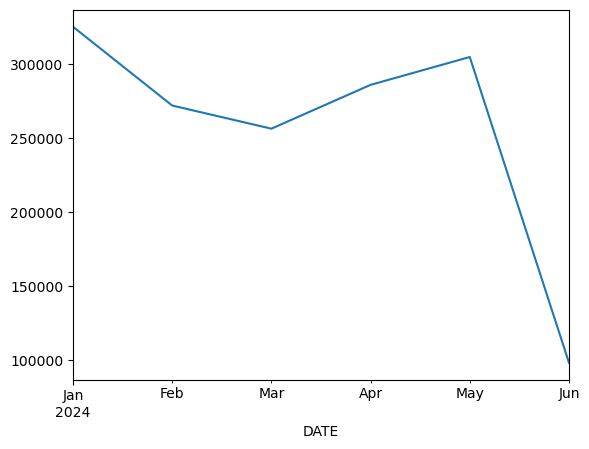

In [435]:
monthly_sales = sales_copy.resample('ME', on='DATE')['SALES'].sum()
monthly_sales.plot(kind='line')
plt.show()

## . Comparison of the Totalsales and totalpaymnets 

Totalp: 2562240
Totals: 1543090


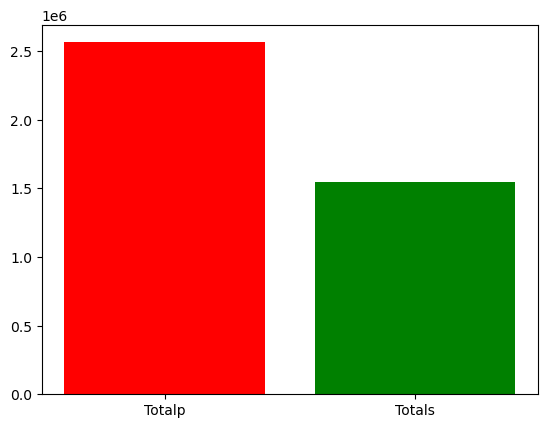

In [449]:
# Aggregate payments and sales
totalp= total_payments['AMOUNT'].sum()
totals = sales_copy['SALES'].sum()

print(f"Totalp: {totalp}")
print(f"Totals: {totals}")

# Plot comparison
plt.bar(['Totalp', 'Totals'], [totalp, totals], color=['red', 'green'])
plt.show()

## OVERALL FINDINGS 
- MPESA Dominates Payments: MPESA is the most frequently used payment method with 1,027 transactions, reflecting its convenience and widespread adoption. CASH follows with 258 transactions, while CREDIT CARD is the least used with only 74 transactions, indicating either limited usage or preference for other methods.

- Sales: Most sales are concentrated in the lower range, between 0-2,500, with a few larger sales exceeding 10,000. This right-skewed distribution suggests that the majority of sales are relatively small, with only a handful of high-value sales.
- Payments: The payment amounts also show a right-skewed distribution, with most payments falling below 5,000. Larger payments, exceeding 20,000, are few but noticeable.
- The most frequent sales range is 0-2,500, aligning with the observation that most sales are on the lower end.
Similarly, the most frequent payment amounts fall between 0-2,500, showing a consistent pattern with the sales distribution.
- Top Customers: There is a clear identification of top customers, both in terms of sales and payments, which could provide insights for targeted marketing or customer engagement strategies.
- Payments: The largest payment month is August, with Ksh 359,390, while the smallest is December with Ksh 24,730.
- Sales: The highest sales occur in January (Ksh 325,400), while the lowest occur in June (Ksh 98,150).
- Sales and Payment Trends: Both sales and payments show a declining trend throughout the year, starting high in January and steadily decreasing. The trends intersect in July, indicating that payments caught up to sales at that point, suggesting that there were previously outstanding balances that were settled after this period.

## Recomendation 
- Encourage MPESA Usage: Since MPESA is the dominant payment method, continue to optimize and promote it as a preferred payment option. Offering incentives for MPESA users, such as discounts or cashback, could encourage even greater adoption.

- Target High-Value Customers: Since a few large transactions contribute significantly to overall sales, consider offering personalized deals or loyalty programs to high-value customers. This can help sustain or even grow the revenue generated from these customers.

- Address Declining Sales and Payments: The decline in both sales and payments throughout the year suggests a potential seasonal trend or customer disengagement. Investigate the causes behind this and develop strategies to boost sales, such as:

1. Offering promotions or discounts during slow months.
2. Launching targeted marketing campaigns to re-engage customers.
3. Implementing payment plans or subscription services to stabilize revenue.

- Improve Credit Card Payment Options: The low usage of credit cards could indicate a need for improvement in credit card payment systems or customer education on how to use them. Offering flexible payment plans or installment options through credit cards could encourage more usage.

-  Focus on Small to Medium Sales: Since the most frequent sales range is 0-2,500, consider offering packages or bundles in this price range to appeal to this core segment of customers. Additionally, investigate opportunities to increase the average transaction size by upselling or cross-selling.

- Monitor Outstanding Payments: The intersection of sales and payments in July suggests a lag in payments for prior sales. Implementing reminders or incentives for timely payments could help in reducing outstanding balances and improve cash flow.

